In [1]:
dogs = ["china", "nala", "zoey", "sandy", "mischka"]
dogs_mcl = ["china", "nala", "zoey", "sandy", "mischka", "mcanlor"]
ref_dog = "mcanlor"

In [2]:
dog_retrocopies_in_fCN = {}
for dog in dogs:
    if dog == "mcanlor":
        continue
    dog_retrocopies_in_fCN[dog] = []
    f = open("{}.retrocopy_intersect_fastCN.txt".format(dog), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        rc = (line[3], line[4], line[5])
        if rc not in dog_retrocopies_in_fCN[dog]:
            dog_retrocopies_in_fCN[dog].append(rc)
    f.close()
dog_retrocopies_in_fCN["mcanlor"] = []
f = open("mCanLor1.2.retrocopy_intersect_fastCN.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    rc = (line[3], line[4], line[5])
    if rc not in dog_retrocopies_in_fCN["mcanlor"]:
        dog_retrocopies_in_fCN["mcanlor"].append(rc)
f.close()
for dog, rcs in dog_retrocopies_in_fCN.items():
    print(dog, len(rcs))

china 561
nala 396
zoey 220
sandy 221
mischka 466
mcanlor 62


In [3]:
# what didn't map?
dog_retrocopy_tracker = {}
for compare_dog in dogs_mcl:
    dog_retrocopy_tracker[compare_dog] = {}
    dog_rcs_w_flanks = {}
    for dog in dogs_mcl:
        if dog == compare_dog:
            continue
        dog_retrocopy_tracker[compare_dog][dog] = {}
        if compare_dog == "mcanlor":
            f = open("mCanLor1.2.all_retrocopies_wUn.sorted.txt", 'rt')
        else:
            f = open("{}.all_retrocopies_wUn.sorted.txt".format(compare_dog), 'rt')
        inFile = f.readlines()
        for line in inFile:
            line = line.rstrip().split()
            chro = line[0]
            dup = (chro, line[1], line[2])
            if dup in dog_retrocopies_in_fCN[compare_dog]:
                continue
            if "chrUn" in chro or "chrY" in chro or "chrM" in chro or "CTG" in chro or "scaffold" in chro or "chrX" in chro:
                continue
            new_start = str(int(line[1]) - 500)
            old_start = line[1]
            old_end = line[2]
            new_end = str(int(line[2]) + 500)

            chro_key = ((chro, old_start, old_end),(chro, new_start, old_start),(chro, old_end, new_end))
            dog_retrocopy_tracker[compare_dog][dog][chro_key] = [0,0] # 5 flank, 3 flank, [x,x] where if x = 0, not present; 1 = present 
        f.close()

In [4]:
# build parent gene accessor
parent_genes = {}
for dog in dogs_mcl:
    parent_genes[dog] = {}
    if dog == "mcanlor":
        f = open("mCanLor1.2.all_retrocopies_wUn.sorted.txt", 'rt')
    else:
        f = open("{}.all_retrocopies_wUn.sorted.txt".format(dog), 'rt')
    for line in f:
        line = line.rstrip().split()
        if "chrUn" in line[0] or "chrY" in line[0] or "chrX" in line[0] or "CTG" in line[0] or "chrM" in line[0] or "scaffold" in line[0]:
            continue
        else:
            parent_genes[dog][tuple(line[0:3])] = line[3]
    f.close()
parent_genes['mischka']

{('chr1', '325443', '330783'): 'ZFR',
 ('chr1', '408403', '409542'): 'SNX3',
 ('chr1', '737234', '737714'): 'RPS17',
 ('chr1', '5129446', '5129882'): 'RPL34',
 ('chr1', '5321743', '5324308'): 'MAPRE1',
 ('chr1', '5723596', '5724821'): 'USP49',
 ('chr1', '6681571', '6682924'): 'NPM1',
 ('chr1', '6863076', '6864098'): 'MTCH2',
 ('chr1', '6892121', '6892855'): 'TEX35',
 ('chr1', '7316394', '7317488'): 'GAPDH',
 ('chr1', '8098375', '8098750'): 'RPL31',
 ('chr1', '9335741', '9337412'): 'HNRNPC',
 ('chr1', '10073974', '10074431'): 'NME1',
 ('chr1', '12966881', '12967310'): 'RPL31',
 ('chr1', '13071355', '13071537'): 'NTPCR',
 ('chr1', '14211120', '14211771'): 'BTF3',
 ('chr1', '14743647', '14744381'): 'PPIA',
 ('chr1', '14868551', '14869191'): 'RPL29',
 ('chr1', '16250498', '16251091'): 'RPL17',
 ('chr1', '16393477', '16394886'): 'ST13',
 ('chr1', '19233451', '19234324'): 'H3-3A',
 ('chr1', '21241008', '21241633'): 'TMSB4X',
 ('chr1', '21578036', '21578804'): 'TIMM9',
 ('chr1', '22415593', '

In [5]:
# update mcanlor tracker with mcanlor rcs
mcanlor_autosomal_retrocopies = []
f = open("mCanLor1.2.all_retrocopies_wUn.sorted.txt", 'rt')
for line in f:
    line = line.rstrip().split()
    chro = line[0]
    dup = (chro, line[1], line[2], line[3])
    if dup in dog_retrocopies_in_fCN[dog]:
        continue
    if "chrUn" in chro or "chrY" in chro or "chrM" in chro or "CTG" in chro or "scaffold" in chro or "chrX" in chro:
        continue
    mcanlor_autosomal_retrocopies.append(dup)
f.close()
mcanlor_autosomal_retrocopies

[('chr1', '16227', '16938', 'LOC119878703'),
 ('chr1', '3667655', '3669201', 'HNRNPA1'),
 ('chr1', '4962924', '4963349', 'RPL31'),
 ('chr1', '5722293', '5724097', 'EEF1A1'),
 ('chr1', '5777011', '5778288', 'HNRNPA1'),
 ('chr1', '7083083', '7085937', 'SAR1A'),
 ('chr1', '7493103', '7494318', 'ZMIZ2'),
 ('chr1', '8369238', '8369806', 'EPHX2'),
 ('chr1', '9133528', '9133804', 'LOC479795'),
 ('chr1', '9858829', '9860929', 'ST13'),
 ('chr1', '10225013', '10225654', 'MRPS26'),
 ('chr1', '10792773', '10793367', 'RPL17'),
 ('chr1', '11367886', '11368908', 'BTF3'),
 ('chr1', '11660769', '11670359', 'EIF4A1'),
 ('chr1', '13171913', '13172945', 'PHB'),
 ('chr1', '14222834', '14223082', 'TOMM6'),
 ('chr1', '14497797', '14498820', 'NSA2'),
 ('chr1', '14661096', '14662401', 'MARCKSL1'),
 ('chr1', '14739448', '14740460', 'MRPS21'),
 ('chr1', '15623432', '15623805', 'RPL10'),
 ('chr1', '16745931', '16747611', 'TUBB'),
 ('chr1', '16956123', '16958678', 'REXO1'),
 ('chr1', '17045200', '17046320', 'PSMA1

In [6]:
# what didn't map?
dog_retrocopy_tracker = {}
for compare_dog in dogs_mcl:
    dog_retrocopy_tracker[compare_dog] = {}
    dog_rcs_w_flanks = {}
    for dog in dogs_mcl:
        if dog == compare_dog:
            continue
        dog_retrocopy_tracker[compare_dog][dog] = {}
        if compare_dog == "mcanlor":
            f = open("mCanLor1.2.all_retrocopies_wUn.sorted.txt", 'rt')
        else:
            f = open("{}.all_retrocopies_wUn.sorted.txt".format(compare_dog), 'rt')
        inFile = f.readlines()
        for line in inFile:
            line = line.rstrip().split()
            chro = line[0]
            dup = (chro, line[1], line[2])
            if dup in dog_retrocopies_in_fCN[dog]:
                continue
            if "chrUn" in chro or "chrY" in chro or "chrM" in chro or "CTG" in chro or "scaffold" in chro or "chrX" in chro:
                continue
            new_start = str(int(line[1]) - 500)
            old_start = line[1]
            old_end = line[2]
            new_end = str(int(line[2]) + 500)
            formatted = "{}:{}-{}".format(chro, old_start, old_end)

            chro_key = ((chro, old_start, old_end),(chro, new_start, old_start),(chro, old_end, new_end))
            dog_retrocopy_tracker[compare_dog][dog][chro_key] = [0,0] # 5 flank, 3 flank, [x,x] where if x = 0, not present; 1 = present 
        f.close()
dog_retrocopy_tracker['mischka']

{'china': {(('chr1', '325443', '330783'),
   ('chr1', '324943', '325443'),
   ('chr1', '330783', '331283')): [0, 0],
  (('chr1', '408403', '409542'),
   ('chr1', '407903', '408403'),
   ('chr1', '409542', '410042')): [0, 0],
  (('chr1', '737234', '737714'),
   ('chr1', '736734', '737234'),
   ('chr1', '737714', '738214')): [0, 0],
  (('chr1', '5129446', '5129882'),
   ('chr1', '5128946', '5129446'),
   ('chr1', '5129882', '5130382')): [0, 0],
  (('chr1', '5321743', '5324308'),
   ('chr1', '5321243', '5321743'),
   ('chr1', '5324308', '5324808')): [0, 0],
  (('chr1', '5723596', '5724821'),
   ('chr1', '5723096', '5723596'),
   ('chr1', '5724821', '5725321')): [0, 0],
  (('chr1', '6681571', '6682924'),
   ('chr1', '6681071', '6681571'),
   ('chr1', '6682924', '6683424')): [0, 0],
  (('chr1', '6863076', '6864098'),
   ('chr1', '6862576', '6863076'),
   ('chr1', '6864098', '6864598')): [0, 0],
  (('chr1', '6892121', '6892855'),
   ('chr1', '6891621', '6892121'),
   ('chr1', '6892855', '689

In [7]:
def update_flank_liftovers(refdog):
    f = open("{}_to_mcanlor_flanks.paf".format(refdog)) # if flanks didn't map, mark the retrocopy in bad_retrocopies
    compare_dog = "mcanlor"
    for line in f:
        line = line.rstrip().split()
        if int(line[11]) == 255:
            continue
        refdog_coord = line[0]
        ref_chro = line[0].split(":")[0]
        ref_start = line[0].split(":")[1].split("-")[0]
        ref_end = line[0].split("-")[1]
        ref_coord = (ref_chro, ref_start, ref_end)

        compare_chro = line[5]
        compare_start = line[7]
        compare_end = line[8]
        compare_coord = (compare_chro, compare_start, compare_end)

        tracker_rcs = list(dog_retrocopy_tracker[refdog][compare_dog].keys())
        for rc_list in tracker_rcs:
            if ref_coord in rc_list:
                if ref_coord == rc_list[1] and dog_retrocopy_tracker[refdog][compare_dog][rc_list][0] == 0:
                    dog_retrocopy_tracker[refdog][compare_dog][rc_list][0] = compare_coord
                elif ref_coord == rc_list[2] and dog_retrocopy_tracker[refdog][compare_dog][rc_list][1] == 0:
                    dog_retrocopy_tracker[refdog][compare_dog][rc_list][1] = compare_coord
    f.close()

In [8]:
for dog in dogs:
    update_flank_liftovers(dog)
dog_retrocopy_tracker['china']['mcanlor']

{(('chr1', '154761', '160097'),
  ('chr1', '154261', '154761'),
  ('chr1', '160097', '160597')): [('chr1', '122448242', '122448744'),
  ('chr1', '122442402', '122442903')],
 (('chr1', '237361', '238500'),
  ('chr1', '236861', '237361'),
  ('chr1', '238500', '239000')): [('chr1', '122365357', '122365858'),
  ('chr1', '122363718', '122364219')],
 (('chr1', '566026', '566506'),
  ('chr1', '565526', '566026'),
  ('chr1', '566506', '567006')): [('chr1', '122036264', '122036765'),
  ('chr1', '122035285', '122035785')],
 (('chr1', '4958233', '4958669'),
  ('chr1', '4957733', '4958233'),
  ('chr1', '4958669', '4959169')): [('chr1', '117652204', '117652706'),
  ('chr1', '117651268', '117651769')],
 (('chr1', '5150645', '5153209'),
  ('chr1', '5150145', '5150645'),
  ('chr1', '5153209', '5153709')): [('chr1', '117461439', '117461940'),
  ('chr1', '117458373', '117458873')],
 (('chr1', '5552074', '5553299'),
  ('chr1', '5551574', '5552074'),
  ('chr1', '5553299', '5553799')): [('chr1', '117059503

In [9]:
# build tracker with mcanlor coords 

In [10]:
def is_overlapping(x1,x2,y1,y2):
    checker = (max(x1,y1) <= min(x2,y2))
    if checker is True:
        return min(x2,y2) - max(x1,y1)
    else:
        return False

In [11]:
def lift_dog_to_mcl(refdog):
    flank_tracker = dog_retrocopy_tracker[refdog]['mcanlor']
    for ref_rcs, mcl_rcs in flank_tracker.items():
        if 0 in mcl_rcs or mcl_rcs[0][0] != mcl_rcs[1][0]: # no lift or no chro match
            continue
        
        parent = parent_genes[refdog][ref_rcs[0]]
        flank_a = mcl_rcs[0]
        flank_b = mcl_rcs[1]
    
        if int(flank_a[2]) < int(flank_b[1]): # left flank is before right
            mcanlor_coords = (flank_a[0], flank_a[2], flank_b[1])
        elif int(flank_b[2]) < int(flank_a[1]): # right is before left
            mcanlor_coords = (flank_a[0], flank_b[2], flank_a[1])
        else: # flanks overlap 
            smallest = 1000000000000
            biggest = 0
            for coord in [int(flank_a[1]), int(flank_a[2]), int(flank_b[1]), int(flank_b[2])]:
                if coord < smallest:
                    smallest = coord
                if coord > biggest:
                    biggest = coord
            mcanlor_coords = (flank_a[0], str(smallest), str(biggest))
        
        matching_rc_found = False
        current_loci = list(retrocopies_in_mcl_coords_tracker.keys())
        for mcl_locus in current_loci:
            if is_overlapping(int(mcanlor_coords[1])-100, int(mcanlor_coords[2])+100, int(mcl_locus[1])-100, int(mcl_locus[2])+100) is not False:
                matching_rc_found = True
                
                if parent != retrocopies_in_mcl_coords_tracker[mcl_locus][0][2]:
                    continue
                    
                already_dogs = {}
                for item in retrocopies_in_mcl_coords_tracker[mcl_locus]:
                    already_dogs[item[0]] = retrocopies_in_mcl_coords_tracker[mcl_locus].index(item)
            
                if refdog in already_dogs.keys():
                    retrocopies_in_mcl_coords_tracker[mcl_locus][already_dogs[refdog]][3] = "DUPLICATE"
                    break 
                
                retrocopies_in_mcl_coords_tracker[mcl_locus].append([refdog, ref_rcs[0], parent, "YES"])
                break
        
        if matching_rc_found is False:
            #print('no mcl loci')
            retrocopies_in_mcl_coords_tracker[mcanlor_coords] = [[refdog, ref_rcs[0], parent, "YES"]]

In [12]:
def update_all_flank_liftovers(refdog, compare_dog):
    f = open("{}_to_{}_flanks.paf".format(refdog, compare_dog)) # if flanks didn't map, mark the retrocopy in bad_retrocopies
    for line in f:
        line = line.rstrip().split()
        if int(line[11]) == 255:
            continue
        refdog_coord = line[0]
        ref_chro = line[0].split(":")[0]
        ref_start = line[0].split(":")[1].split("-")[0]
        ref_end = line[0].split("-")[1]
        ref_coord = (ref_chro, ref_start, ref_end)

        compare_chro = line[5]
        compare_start = line[7]
        compare_end = line[8]
        compare_coord = (compare_chro, compare_start, compare_end)

        tracker_rcs = list(dog_retrocopy_tracker[refdog][compare_dog].keys())
        for rc_list in tracker_rcs:
            if ref_coord in rc_list:
                if ref_coord == rc_list[1] and dog_retrocopy_tracker[refdog][compare_dog][rc_list][0] == 0:
                    dog_retrocopy_tracker[refdog][compare_dog][rc_list][0] = compare_coord
                elif ref_coord == rc_list[2] and dog_retrocopy_tracker[refdog][compare_dog][rc_list][1] == 0:
                    dog_retrocopy_tracker[refdog][compare_dog][rc_list][1] = compare_coord
    f.close()

In [13]:
for rdog in dogs_mcl:
    for cdog in dogs_mcl:
        if rdog == cdog:
            continue
        else:
            print("{} to {}".format(rdog, cdog))
            update_all_flank_liftovers(rdog, cdog)
dog_retrocopy_tracker['china']['mischka']

china to nala
china to zoey
china to sandy
china to mischka
china to mcanlor
nala to china
nala to zoey
nala to sandy
nala to mischka
nala to mcanlor
zoey to china
zoey to nala
zoey to sandy
zoey to mischka
zoey to mcanlor
sandy to china
sandy to nala
sandy to zoey
sandy to mischka
sandy to mcanlor
mischka to china
mischka to nala
mischka to zoey
mischka to sandy
mischka to mcanlor
mcanlor to china
mcanlor to nala
mcanlor to zoey
mcanlor to sandy
mcanlor to mischka


{(('chr1', '154761', '160097'),
  ('chr1', '154261', '154761'),
  ('chr1', '160097', '160597')): [('chr1', '324942', '325443'),
  ('chr1', '330782', '331283')],
 (('chr1', '237361', '238500'),
  ('chr1', '236861', '237361'),
  ('chr1', '238500', '239000')): [('chr1', '407902', '408403'),
  ('chr1', '409541', '410042')],
 (('chr1', '566026', '566506'),
  ('chr1', '565526', '566026'),
  ('chr1', '566506', '567006')): [('chr1', '736733', '737234'),
  ('chr1', '737713', '738214')],
 (('chr1', '4958233', '4958669'),
  ('chr1', '4957733', '4958233'),
  ('chr1', '4958669', '4959169')): [('chr1', '5128945', '5129446'),
  ('chr1', '5129881', '5130382')],
 (('chr1', '5150645', '5153209'),
  ('chr1', '5150145', '5150645'),
  ('chr1', '5153209', '5153709')): [('chr1', '5321242', '5321743'),
  ('chr1', '5324311', '5324811')],
 (('chr1', '5552074', '5553299'),
  ('chr1', '5551574', '5552074'),
  ('chr1', '5553299', '5553799')): [('chr1', '5723095', '5723596'),
  ('chr1', '5724820', '5725321')],
 (('

In [14]:
def ucsc_to_tuple(ucsc):
    chro = ucsc.split(":")[0]
    start = ucsc.split(":")[1].split("-")[0]
    end = ucsc.split("-")[1]
    ucsc_tuple = (chro, start, end)
    return ucsc_tuple

# START HERE TO RERUN TRACKER LOOP

In [15]:
retrocopies_in_mcl_coords_tracker = {}
for locus in mcanlor_autosomal_retrocopies:
    locus_coords = locus[0:3]
    retrocopies_in_mcl_coords_tracker[locus_coords] = []
    retrocopies_in_mcl_coords_tracker[locus_coords].append(["mcanlor", locus_coords, locus[3], "YES"]) # dog, parent gene, presence
retrocopies_in_mcl_coords_tracker

{('chr1',
  '16227',
  '16938'): [['mcanlor', ('chr1', '16227', '16938'), 'LOC119878703', 'YES']],
 ('chr1',
  '3667655',
  '3669201'): [['mcanlor', ('chr1', '3667655', '3669201'), 'HNRNPA1', 'YES']],
 ('chr1',
  '4962924',
  '4963349'): [['mcanlor', ('chr1', '4962924', '4963349'), 'RPL31', 'YES']],
 ('chr1',
  '5722293',
  '5724097'): [['mcanlor', ('chr1', '5722293', '5724097'), 'EEF1A1', 'YES']],
 ('chr1',
  '5777011',
  '5778288'): [['mcanlor', ('chr1', '5777011', '5778288'), 'HNRNPA1', 'YES']],
 ('chr1',
  '7083083',
  '7085937'): [['mcanlor', ('chr1', '7083083', '7085937'), 'SAR1A', 'YES']],
 ('chr1',
  '7493103',
  '7494318'): [['mcanlor', ('chr1', '7493103', '7494318'), 'ZMIZ2', 'YES']],
 ('chr1',
  '8369238',
  '8369806'): [['mcanlor', ('chr1', '8369238', '8369806'), 'EPHX2', 'YES']],
 ('chr1',
  '9133528',
  '9133804'): [['mcanlor',
   ('chr1', '9133528', '9133804'),
   'LOC479795',
   'YES']],
 ('chr1',
  '9858829',
  '9860929'): [['mcanlor', ('chr1', '9858829', '9860929'), '

In [16]:
for dog in dogs:
    print(dog)
    lift_dog_to_mcl(dog)

china
nala
zoey
sandy
mischka


In [17]:
counts = {}
for mcl_coords, dog_entries in retrocopies_in_mcl_coords_tracker.items():
    entry_count = len(dog_entries)
    if entry_count not in counts.keys():
        counts[entry_count] = 0
    if entry_count > 6:
        print(mcl_coords, dog_entries)
        print()
    counts[entry_count] += 1
counts

{3: 119, 1: 322, 6: 2478, 5: 445, 4: 112, 2: 118}

In [18]:
len(retrocopies_in_mcl_coords_tracker)

3594

In [19]:
# now need to update each locus with presence/absence of other dogs 

In [20]:
# check flanks - did they carry 

In [21]:
rcs_to_update = {} # these are the retrocopies that still need to be verified if present in other dogs 
for mcl_coords, dog_entries in retrocopies_in_mcl_coords_tracker.items():
    entry_count = len(dog_entries)
    if entry_count < 6:
        rcs_to_update[mcl_coords] = dog_entries
rcs_to_update

{('chr1',
  '16227',
  '16938'): [['mcanlor',
   ('chr1', '16227', '16938'),
   'LOC119878703',
   'YES'], ['nala', ('chr1',
    '122939079',
    '122939446'), 'LOC119878703', 'YES'], ['zoey',
   ('chr1', '122879076', '122879443'),
   'LOC119878703',
   'YES']],
 ('chr1',
  '3667655',
  '3669201'): [['mcanlor', ('chr1', '3667655', '3669201'), 'HNRNPA1', 'YES']],
 ('chr1',
  '7493103',
  '7494318'): [['mcanlor', ('chr1', '7493103', '7494318'), 'ZMIZ2', 'YES'],
  ['nala', ('chr1', '115461811', '115463028'), 'ZMIZ2', 'YES'],
  ['zoey', ('chr1', '115389292', '115390507'), 'ZMIZ2', 'YES'],
  ['sandy', ('chr1', '115342343', '115343560'), 'ZMIZ2', 'YES'],
  ['mischka', ('chr1', '116057509', '116058726'), 'ZMIZ2', 'YES']],
 ('chr1',
  '9133528',
  '9133804'): [['mcanlor',
   ('chr1', '9133528', '9133804'),
   'LOC479795',
   'YES'], ['zoey',
   ('chr1', '113674992', '113675268'),
   'LOC479795',
   'YES'], ['sandy', ('chr1',
    '113632100',
    '113632376'), 'LOC479795', 'YES'], ['mischka',
 

In [22]:
# for each of these entries, need to minimap from a priority dog -> missing dog flanks + intervening 
def find_missing_dogs(present_dogs, entries):
    priorities = ['zoey', 'china', 'nala', 'sandy', 'mischka', 'mcanlor']
    subtraction = []
    reference_dog = ""
    for dog in priorities:
        if dog not in present_dogs:
            subtraction.append(dog)
        else:
            reference_dog = dog
    for entry in entries:
        if entry[0] == reference_dog:
            reference_coords = entry[1]
    
    return reference_dog, reference_coords, subtraction 

In [23]:
refdog_to_missing_dogs = {}
refdog_to_missing_dog_og_seq = {}
refdog_to_missing_dog_og_seq_from_flank = {}
for mcl_coords, dog_entries in rcs_to_update.items():
    present_dogs = [i[0] for i in dog_entries]
    ref_dog, ref_coord, missing_dogs  = find_missing_dogs(present_dogs, dog_entries)
    chro = ref_coord[0]
    new_start = str(int(ref_coord[1]) - 500)
    old_start = str(ref_coord[1])
    old_end = str(ref_coord[2])
    new_end = str(int(ref_coord[2]) + 500)
    ref_coords_w_flanks = (chro, new_start, new_end)
    
    for mdog in missing_dogs:
        if ref_dog not in refdog_to_missing_dogs.keys():
            refdog_to_missing_dogs[ref_dog] = {}
            refdog_to_missing_dog_og_seq[ref_dog] = {}
            refdog_to_missing_dog_og_seq_from_flank[ref_dog] = {}
        if mdog not in refdog_to_missing_dogs[ref_dog].keys():
            refdog_to_missing_dogs[ref_dog][mdog] = []
            refdog_to_missing_dog_og_seq[ref_dog][mdog] = {}
            refdog_to_missing_dog_og_seq_from_flank[ref_dog][mdog] = {}
    
        refdog_to_missing_dogs[ref_dog][mdog].append([ref_coords_w_flanks, mcl_coords])
        refdog_to_missing_dog_og_seq[ref_dog][mdog][ref_coords_w_flanks] = mcl_coords
        refdog_to_missing_dog_og_seq_from_flank[ref_dog][mdog][(ref_coord,(chro, new_start, old_start), (chro, old_end, new_end))] = mcl_coords
refdog_to_missing_dogs

{'mcanlor': {'china': [[('chr1', '15727', '17438'),
    ('chr1', '16227', '16938')],
   [('chr1', '3667155', '3669701'), ('chr1', '3667655', '3669201')],
   [('chr1', '7492603', '7494818'), ('chr1', '7493103', '7494318')],
   [('chr1', '9133028', '9134304'), ('chr1', '9133528', '9133804')],
   [('chr1', '9858329', '9861429'), ('chr1', '9858829', '9860929')],
   [('chr1', '17653208', '17654596'), ('chr1', '17653708', '17654096')],
   [('chr1', '17658196', '17659866'), ('chr1', '17658696', '17659366')],
   [('chr1', '17730907', '17732247'), ('chr1', '17731407', '17731747')],
   [('chr1', '18357334', '18359890'), ('chr1', '18357834', '18359390')],
   [('chr1', '21245530', '21247494'), ('chr1', '21246030', '21246994')],
   [('chr1', '22254741', '22258388'), ('chr1', '22255241', '22257888')],
   [('chr1', '39472419', '39475175'), ('chr1', '39472919', '39474675')],
   [('chr1', '40101528', '40102897'), ('chr1', '40102028', '40102397')],
   [('chr1', '73301310', '73303973'), ('chr1', '7330181

In [24]:
for dog, to_dog in refdog_to_missing_dogs.items():
    for cdog, seqs in to_dog.items():
        print("{} to {} for {} sequences".format(dog, cdog, len(seqs)))

mcanlor to china for 378 sequences
mcanlor to sandy for 365 sequences
mcanlor to mischka for 477 sequences
mcanlor to zoey for 401 sequences
mcanlor to nala for 446 sequences
china to zoey for 35 sequences
china to nala for 38 sequences
china to sandy for 38 sequences
china to mischka for 38 sequences
china to mcanlor for 38 sequences
mischka to mcanlor for 105 sequences
mischka to zoey for 51 sequences
mischka to nala for 38 sequences
mischka to sandy for 49 sequences
mischka to china for 52 sequences
nala to sandy for 32 sequences
nala to mischka for 32 sequences
nala to mcanlor for 32 sequences
nala to zoey for 22 sequences
nala to china for 28 sequences
sandy to zoey for 53 sequences
sandy to nala for 53 sequences
sandy to mischka for 62 sequences
sandy to mcanlor for 62 sequences
sandy to china for 53 sequences
zoey to china for 26 sequences
zoey to nala for 26 sequences
zoey to sandy for 26 sequences
zoey to mischka for 26 sequences
zoey to mcanlor for 26 sequences


In [25]:
rcs_with_intervening_to_verify = {}
for refdog, mdog_entries in refdog_to_missing_dogs.items():
    for mdog, coords in mdog_entries.items():
        for coord in coords:
            ref_flanks = coord[0]
            ref_chro = ref_flanks[0]
            ref_new_start = ref_flanks[1]
            ref_new_end = ref_flanks[2]
            ref_old_start = str(int(ref_new_start) + 500)
            ref_old_end = str(int(ref_new_end) - 500)
            retrocopy_flank_key = ((ref_chro, ref_old_start, ref_old_end), (ref_chro, ref_new_start, ref_old_start), (ref_chro, ref_old_end, ref_new_end))
            mapped_flanks = dog_retrocopy_tracker[refdog][mdog][retrocopy_flank_key]
            
            mcl_key = coord[1]
            mcl_min_size = (int(mcl_key[2]) - int(mcl_key[1])) * 0.75
            
            if 0 in mapped_flanks or mapped_flanks[0][0] != mapped_flanks[1][0]: # missing flank or no chro match
                retrocopies_in_mcl_coords_tracker[mcl_key].append([mdog, "N/A", "N/A", "N/A"])
            else:
                dog_chro = mapped_flanks[0][0]
                dog_aflank_start = int(mapped_flanks[0][1])
                dog_aflank_end = int(mapped_flanks[0][2])
                dog_bflank_start = int(mapped_flanks[1][1])
                dog_bflank_end = int(mapped_flanks[1][2]) 
                
                if dog_aflank_end < dog_bflank_start:
                    ref_size = dog_bflank_start - dog_aflank_end
                    if ref_size < mcl_min_size or ref_size > 10000:
                        retrocopies_in_mcl_coords_tracker[mcl_key].append([mdog, (dog_chro, dog_aflank_start, dog_bflank_end), "N/A", "NO"])
                        continue
                elif dog_bflank_end < dog_aflank_start:
                    ref_size = dog_aflank_start - dog_bflank_end
                    if ref_size < mcl_min_size or ref_size > 10000:
                        retrocopies_in_mcl_coords_tracker[mcl_key].append([mdog, (dog_chro, dog_bflank_start, dog_aflank_end), "N/A", "NO"])
                        continue
                else: # flanks overlap in the mapping, nothing in between 
                    smallest = 1000000000000
                    biggest = 0
                    for coord in [dog_aflank_start,dog_aflank_end, dog_bflank_start, dog_bflank_end]:
                        if coord < smallest:
                            smallest = coord
                        if coord > biggest:
                            biggest = coord
                    mdog_coords = (dog_chro, str(smallest), str(biggest))
                    retrocopies_in_mcl_coords_tracker[mcl_key].append([mdog, (mdog_coords), "N/A", "NO"])
                    continue
                    
                # at this point, there is intervening sequence that could possibly be a retrocopy
                if refdog not in rcs_with_intervening_to_verify.keys():
                    rcs_with_intervening_to_verify[refdog] = {}
                if mdog not in rcs_with_intervening_to_verify[refdog].keys():
                    rcs_with_intervening_to_verify[refdog][mdog] = []
                rcs_with_intervening_to_verify[refdog][mdog].append(coord)
rcs_with_intervening_to_verify

{'mcanlor': {'china': [[('chr1', '15727', '17438'),
    ('chr1', '16227', '16938')],
   [('chr1', '7492603', '7494818'), ('chr1', '7493103', '7494318')],
   [('chr1', '9133028', '9134304'), ('chr1', '9133528', '9133804')],
   [('chr1', '9858329', '9861429'), ('chr1', '9858829', '9860929')],
   [('chr1', '17653208', '17654596'), ('chr1', '17653708', '17654096')],
   [('chr1', '17658196', '17659866'), ('chr1', '17658696', '17659366')],
   [('chr1', '17730907', '17732247'), ('chr1', '17731407', '17731747')],
   [('chr1', '21245530', '21247494'), ('chr1', '21246030', '21246994')],
   [('chr1', '22254741', '22258388'), ('chr1', '22255241', '22257888')],
   [('chr1', '40101528', '40102897'), ('chr1', '40102028', '40102397')],
   [('chr1', '79661818', '79663412'), ('chr1', '79662318', '79662912')],
   [('chr1', '79769859', '79772592'), ('chr1', '79770359', '79772092')],
   [('chr1', '82302619', '82304697'), ('chr1', '82303119', '82304197')],
   [('chr1', '91588248', '91590886'), ('chr1', '915

In [26]:
counts = {}
for mcl_coords, dog_entries in retrocopies_in_mcl_coords_tracker.items():
    entry_count = len(dog_entries)
    if entry_count not in counts.keys():
        counts[entry_count] = 0
    if entry_count > 6:
        print(mcl_coords, dog_entries)
        print()
    counts[entry_count] += 1
counts

{3: 96, 6: 2802, 5: 434, 4: 109, 1: 92, 2: 61}

In [27]:
# intervening has been run (see pull_intervening_seqs.sb and intervening_liftover.sb)
# time to parse CIGAR string to matching flanks
# if flanks map, and in between maps: retrocopy present, mark YES for that dog
# if flanks map, but nothing in between: retrocopy not present, mark NO
# if flank do not map: retrocopy sharing undetermined, mark N/A

In [28]:
def expand_cigar(cigar): #thanks jeff
    res = []
    if cigar == '*':
        return res
    digits = ['0','1','2','3','4','5','6','7','8','9']
    accumulate = ''
    i = 0
    while True:
        if i == len(cigar):
            break
        if cigar[i] in digits:
            accumulate += cigar[i]
            i += 1
        else:
            d = int(accumulate)
            res.append([d,cigar[i]])
            i += 1
            accumulate = ''
    return res

In [29]:
refdog_to_missing_dog_minimap = {}
for refdog, mdog_results in rcs_with_intervening_to_verify.items():
    if refdog not in refdog_to_missing_dog_minimap.keys():
        refdog_to_missing_dog_minimap[refdog] = {}
    for mdog, coords in mdog_results.items():
        if mdog not in refdog_to_missing_dog_minimap[refdog].keys():
            refdog_to_missing_dog_minimap[refdog][mdog] = {} 

        f = open("{}_intervening_w_flanks_for_{}.paf".format(refdog, mdog), 'rt')
        for line in f:
            line = line.rstrip().split()
            
            size = int(line[1])
            start_query = int(line[2])
            end_query = int(line[3])
            
            if start_query > 250 or end_query < (size - 250):
                continue
            
            chro = line[0].split(":")[0]
            start = line[0].split(":")[1].split("-")[0]
            end = line[0].split("-")[1]
            in_seq = (chro, start, end)
            
            if in_seq not in [coord[0] for coord in coords]:
                continue
            
            if in_seq not in refdog_to_missing_dog_minimap[refdog][mdog].keys():
                refdog_to_missing_dog_minimap[refdog][mdog][in_seq] = []
            
            mi_seq = (line[5], line[7], line[8])
            
            cigar_string = line[-1].split(":")[-1]
            expanded_cigar = expand_cigar(cigar_string)
            
            refdog_to_missing_dog_minimap[refdog][mdog][in_seq].append([mi_seq, expanded_cigar, size, start_query])
        f.close()
refdog_to_missing_dog_minimap

{'mcanlor': {'china': {('chr1',
    '15727',
    '17438'): [[('chr1', '122482441', '122484144'),
     [[295, 'M'],
      [5, 'I'],
      [158, 'M'],
      [2, 'I'],
      [796, 'M'],
      [2, 'I'],
      [454, 'M']],
     1712,
     0]],
   ('chr1',
    '7492603',
    '7494818'): [[('chr1', '115007613', '115009826'),
     [[300, 'M'],
      [4, 'I'],
      [83, 'M'],
      [1, 'I'],
      [195, 'M'],
      [2, 'I'],
      [66, 'M'],
      [2, 'D'],
      [786, 'M'],
      [2, 'D'],
      [779, 'M']],
     2216,
     0]],
   ('chr1',
    '9133028',
    '9134304'): [[('chr1', '113307154', '113308431'), [[1277, 'M']], 1277, 0]],
   ('chr1',
    '9858329',
    '9861429'): [[('chr1', '112581995', '112585095'),
     [[1265, 'M'], [1, 'I'], [1835, 'M']],
     3101,
     0]],
   ('chr1',
    '17653208',
    '17654596'): [[('chr1', '104915836', '104917224'),
     [[293, 'M'],
      [2, 'I'],
      [151, 'M'],
      [7, 'D'],
      [24, 'M'],
      [1, 'D'],
      [241, 'M'],
      [6, 'I'],
  

In [30]:
for dog, to_dog in rcs_with_intervening_to_verify.items():
    for cdog, seqs in to_dog.items():
        print("{} to {} for {} sequences".format(dog, cdog, len(seqs)))

mcanlor to china for 233 sequences
mcanlor to sandy for 234 sequences
mcanlor to mischka for 330 sequences
mcanlor to zoey for 247 sequences
mcanlor to nala for 323 sequences
china to zoey for 4 sequences
china to nala for 5 sequences
china to sandy for 4 sequences
china to mischka for 5 sequences
china to mcanlor for 6 sequences
mischka to mcanlor for 60 sequences
mischka to zoey for 17 sequences
mischka to nala for 14 sequences
mischka to sandy for 11 sequences
mischka to china for 12 sequences
nala to sandy for 8 sequences
nala to mischka for 9 sequences
nala to mcanlor for 8 sequences
nala to zoey for 4 sequences
nala to china for 6 sequences
sandy to zoey for 12 sequences
sandy to nala for 11 sequences
sandy to mischka for 16 sequences
sandy to mcanlor for 16 sequences
sandy to china for 12 sequences
zoey to china for 8 sequences
zoey to nala for 8 sequences
zoey to sandy for 7 sequences
zoey to mischka for 7 sequences
zoey to mcanlor for 7 sequences


In [31]:
for rdog, mdog_res in refdog_to_missing_dog_minimap.items():
    for mdog, res in mdog_res.items():
        print("{} to {}, {} sequences found".format(rdog, mdog, len(res)))

mcanlor to china, 227 sequences found
mcanlor to sandy, 228 sequences found
mcanlor to mischka, 322 sequences found
mcanlor to zoey, 244 sequences found
mcanlor to nala, 318 sequences found
china to zoey, 3 sequences found
china to nala, 4 sequences found
china to sandy, 3 sequences found
china to mischka, 3 sequences found
china to mcanlor, 3 sequences found
mischka to mcanlor, 55 sequences found
mischka to zoey, 15 sequences found
mischka to nala, 14 sequences found
mischka to sandy, 11 sequences found
mischka to china, 11 sequences found
nala to sandy, 6 sequences found
nala to mischka, 8 sequences found
nala to mcanlor, 6 sequences found
nala to zoey, 4 sequences found
nala to china, 5 sequences found
sandy to zoey, 10 sequences found
sandy to nala, 10 sequences found
sandy to mischka, 15 sequences found
sandy to mcanlor, 15 sequences found
sandy to china, 11 sequences found
zoey to china, 6 sequences found
zoey to nala, 6 sequences found
zoey to sandy, 5 sequences found
zoey to mi

In [32]:
# update mcanlor tracker with missing sequences
refdog_to_missing_dog_lift_checker = {}
for dog, to_dog in rcs_with_intervening_to_verify.items():
    if dog not in refdog_to_missing_dog_lift_checker.keys():
        refdog_to_missing_dog_lift_checker[dog] = {}
    for cdog, seqs in to_dog.items():
        if cdog not in refdog_to_missing_dog_lift_checker[dog].keys():
            refdog_to_missing_dog_lift_checker[dog][cdog] = {}
        for seq in seqs:
            refdog_seq = seq[0]
            mcanlor_coord = seq[1]
            if refdog_seq in list(refdog_to_missing_dog_minimap[dog][cdog].keys()):
                refdog_to_missing_dog_lift_checker[dog][cdog][mcanlor_coord] = True
            else:
                refdog_to_missing_dog_lift_checker[dog][cdog][mcanlor_coord] = False
for refdog, mdog_res in refdog_to_missing_dog_lift_checker.items():
    for mdog, coords in mdog_res.items():
        for coord, res in coords.items():
            if res is False:
                print("{} not found in {} to {}".format(coord, refdog, mdog))
                retrocopies_in_mcl_coords_tracker[coord].append([mdog, "N/A", "N/A", "N/A"])

('chr1', '79770359', '79772092') not found in mcanlor to china
('chr3', '29995610', '29996196') not found in mcanlor to china
('chr36', '7994072', '7994404') not found in mcanlor to china
('chr6', '6183522', '6183891') not found in mcanlor to china
('chr6', '11826262', '11826728') not found in mcanlor to china
('chr8', '42931415', '42931866') not found in mcanlor to china
('chr14', '58570556', '58570873') not found in mcanlor to sandy
('chr14', '59102120', '59102437') not found in mcanlor to sandy
('chr3', '29995610', '29996196') not found in mcanlor to sandy
('chr4', '67101946', '67102404') not found in mcanlor to sandy
('chr6', '11826262', '11826728') not found in mcanlor to sandy
('chr8', '31430225', '31430801') not found in mcanlor to sandy
('chr16', '18918114', '18918612') not found in mcanlor to mischka
('chr18', '3668681', '3669482') not found in mcanlor to mischka
('chr21', '4590022', '4590796') not found in mcanlor to mischka
('chr29', '3823676', '3826660') not found in mcanlo

In [33]:
counts = {}
singletons = {}
for mcl_coords, dog_entries in retrocopies_in_mcl_coords_tracker.items():
    entry_count = len(dog_entries)
    if entry_count not in counts.keys():
        counts[entry_count] = 0
    if entry_count > 6:
        print(mcl_coords, dog_entries)
        print()
    if entry_count == 1:
        singletons[mcl_coords] = dog_entries
    counts[entry_count] += 1
counts

{3: 94, 6: 2828, 5: 423, 4: 105, 1: 87, 2: 57}

In [34]:
singletons

{('chr1',
  '40102028',
  '40102397'): [['mcanlor', ('chr1', '40102028', '40102397'), 'ABCB7', 'YES']],
 ('chr1',
  '79662318',
  '79662912'): [['mcanlor',
   ('chr1', '79662318', '79662912'),
   'DHFR/LOC609048',
   'YES']],
 ('chr1',
  '82303119',
  '82304197'): [['mcanlor',
   ('chr1', '82303119', '82304197'),
   'DIS3/RPL29',
   'YES']],
 ('chr1',
  '96599845',
  '96599999'): [['mcanlor',
   ('chr1', '96599845', '96599999'),
   'DEPDC1',
   'YES']],
 ('chr10',
  '18265919',
  '18267126'): [['mcanlor',
   ('chr10', '18265919', '18267126'),
   'PRELID1',
   'YES']],
 ('chr10',
  '32975472',
  '32976077'): [['mcanlor',
   ('chr10', '32975472', '32976077'),
   'LOC100688605/HMGN2',
   'YES']],
 ('chr10',
  '37854776',
  '37856353'): [['mcanlor',
   ('chr10', '37854776', '37856353'),
   'LOC475707/LOC119878734',
   'YES']],
 ('chr11',
  '1272930',
  '1274249'): [['mcanlor', ('chr11', '1272930', '1274249'), 'MRPS7', 'YES']],
 ('chr11',
  '8754644',
  '8755164'): [['mcanlor', ('chr11', '8

In [35]:
# finally, parse cigar strings and update tracker 

In [36]:
def check_cigar(c_list, query_size, starting_ind):
    cigar_tracker = ["X" for i in range(query_size)]
    tracker = starting_ind
    for matches in c_list:
        match_size = matches[0]
        match_type = matches[1]
        if match_type == "D":
            continue
        for i in range(match_size):
            cigar_tracker[tracker + i] = match_type
        tracker += match_size
        
    first_flank = cigar_tracker[:500]
    second_flank = cigar_tracker[(query_size - 500):]
    in_between = cigar_tracker[500:(query_size - 500)]
    
    first_flank_dict = {}
    second_flank_dict = {}
    middle_dict = {}
    for letter in first_flank:
        if letter not in first_flank_dict.keys():
            first_flank_dict[letter] = 0
        first_flank_dict[letter] += 1
    for letter in second_flank:
        if letter not in second_flank_dict.keys():
            second_flank_dict[letter] = 0
        second_flank_dict[letter] += 1
    for letter in in_between:
        if letter not in middle_dict.keys():
            middle_dict[letter] = 0
        middle_dict[letter] += 1
        
    rc_size = query_size - 1000
    min_match = 0.6
    
    if 'M' not in middle_dict.keys():
        result = False
        print('no RC in between')
    elif first_flank_dict['M'] > (500 * min_match) and second_flank_dict['M'] > (500 * min_match) and middle_dict['M'] > (rc_size * min_match):
        result = True
    else:
        result = False 
        print('not enough matches')
        print(first_flank_dict['M'], second_flank_dict['M'], middle_dict['M'], rc_size, rc_size * 0.6)
        print(first_flank_dict, second_flank_dict, middle_dict)
    
    return result

In [37]:
retrocopies_in_mcl_coords_tracker[('chr11', '68231187', '68231787')]

[['mcanlor', ('chr11', '68231187', '68231787'), 'RPL29', 'YES']]

In [38]:
fail = 0
for refdog, mdog_results in refdog_to_missing_dog_minimap.items():
    for mdog, retrocopies in mdog_results.items():
        for lifted_rc, mm2_hits in retrocopies.items():
            mcanlor_tracker_key = refdog_to_missing_dog_og_seq[refdog][mdog][lifted_rc]
            parent_gene = retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key][0][2]
            for mm2_hit in mm2_hits:
                lifted_coords = mm2_hit[0]
                cigar_list = mm2_hit[1]
                hit_size = mm2_hit[2]
                start_query = mm2_hit[3]

                did_it_lift = check_cigar(cigar_list, hit_size, start_query)
                if did_it_lift is False:
                    fail += 1
                    print(lifted_rc, refdog, mdog)
                    print()
                # check for duplicate                
                dup_found = False
                for entry in retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key]:
                    #print(entry[0], mdog, retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key].index(entry), retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key][retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key].index(entry)][3])
                    if entry[0] == mdog:
                        #print('dup', entry[0], mdog, lifted_coords)
                        dup_index = retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key].index(entry)
                        #print(dup_index)
                        retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key][dup_index][3] == "DUPLICATE"
                        dup_found = True
                        continue
                
                if dup_found is False:
                    if did_it_lift is True:
                        # add YES to mcanlor tracker
                        retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key].append([mdog, lifted_coords, parent_gene, 'YES'])
                    else:
                        # add NO to mcanlor tracker
                        retrocopies_in_mcl_coords_tracker[mcanlor_tracker_key].append([mdog, lifted_coords, "N/A", 'NO'])
                        
print(fail)

not enough matches
486 442 207 385 231.0
{'M': 486, 'I': 14} {'I': 58, 'M': 442} {'M': 207, 'I': 178}
('chr12', '38104900', '38106284') mcanlor china

not enough matches
486 274 1424 1424 854.4
{'M': 486, 'I': 14} {'M': 274, 'X': 226} {'M': 1424}
('chr15', '16691494', '16693917') mcanlor china

not enough matches
300 500 1074 1075 645.0
{'X': 200, 'M': 300} {'M': 500} {'M': 1074, 'I': 1}
('chr11', '44184152', '44186226') mcanlor sandy

not enough matches
500 274 1424 1424 854.4
{'M': 500} {'M': 274, 'X': 226} {'M': 1424}
('chr15', '16691494', '16693917') mcanlor mischka

not enough matches
500 260 2376 2376 1425.6
{'M': 500} {'M': 260, 'I': 2, 'X': 238} {'M': 2376}
('chr9', '43202730', '43206105') mcanlor mischka

not enough matches
500 260 2376 2376 1425.6
{'M': 500} {'M': 260, 'I': 2, 'X': 238} {'M': 2376}
('chr9', '43202730', '43206105') mcanlor mischka

not enough matches
498 262 2376 2376 1425.6
{'M': 498, 'I': 2} {'M': 262, 'X': 238} {'M': 2376}
('chr9', '43202730', '43206105') m

In [39]:
retrocopies_in_mcl_coords_tracker[('chr11', '68231187', '68231787')]

[['mcanlor', ('chr11', '68231187', '68231787'), 'RPL29', 'YES'],
 ['china', ('chr11', '66546822', '66548294'), 'RPL29', 'YES'],
 ['sandy', ('chr11', '66401881', '66403482'), 'RPL29', 'YES'],
 ['mischka', ('chr11', '67291121', '67292593'), 'RPL29', 'YES'],
 ['zoey', ('chr11', '66523556', '66525154'), 'RPL29', 'YES'],
 ['nala', ('chr11', '67086707', '67088300'), 'RPL29', 'YES']]

In [40]:
counts = {}
for mcl_coords, dog_entries in retrocopies_in_mcl_coords_tracker.items():
    entry_count = len(dog_entries)
    if entry_count not in counts.keys():
        counts[entry_count] = 0
    if entry_count > 6:
        print(mcl_coords, dog_entries)
        print()
    counts[entry_count] += 1
counts

{6: 3594}

In [41]:
retrocopies_in_mcl_coords_tracker

{('chr1',
  '16227',
  '16938'): [['mcanlor',
   ('chr1', '16227', '16938'),
   'LOC119878703',
   'YES'], ['nala', ('chr1',
    '122939079',
    '122939446'), 'LOC119878703', 'YES'], ['zoey',
   ('chr1', '122879076', '122879443'),
   'LOC119878703',
   'YES'], ['china',
   ('chr1', '122482441', '122484144'),
   'LOC119878703',
   'YES'], ['sandy',
   ('chr1', '122823273', '122824976'),
   'LOC119878703',
   'YES'], ['mischka',
   ('chr1', '123542956', '123544653'),
   'LOC119878703',
   'YES']],
 ('chr1',
  '3667655',
  '3669201'): [['mcanlor',
   ('chr1', '3667655', '3669201'),
   'HNRNPA1',
   'YES'], ['china', ('chr1',
    '118831448',
    '118832415'), 'N/A', 'NO'], ['sandy',
   ('chr1', '119167847', '119168813'),
   'N/A',
   'NO'], ['mischka',
   ('chr1', '119890565', '119891531'),
   'N/A',
   'NO'], ['zoey', ('chr1', '119210311', '119211275'), 'N/A', 'NO'], ['nala',
   ('chr1', '119292004', '119292971'),
   'N/A',
   'NO']],
 ('chr1',
  '4962924',
  '4963349'): [['mcanlor',
  

In [42]:
# update polymorphics
final_rcs_for_all_v_all = {}
for mcl_coord, dog_rcs in retrocopies_in_mcl_coords_tracker.items():
    valid = True
    for entry in dog_rcs:
        presence = entry[3] # mcanlor coords, parent gene, dog, dog coords, presence/absence
        if presence == "N/A" or presence == "DUPLICATE":
            valid = False
            break
    if valid is True:
        final_rcs_for_all_v_all[mcl_coord] = dog_rcs
len(final_rcs_for_all_v_all)

3377

In [44]:
rc_name_counts = {}
for mcl_coords, dog_rcs in final_rcs_for_all_v_all.items():
    dog_names = []
    for rc in dog_rcs:
        if rc[3] == "YES":
            dog_names.append(rc[0]) 
    if len(dog_names) == 0:
        continue
    sorted_dog = tuple(sorted(dog_names))
    if sorted_dog not in rc_name_counts.keys():
        rc_name_counts[sorted_dog] = 0
    rc_name_counts[sorted_dog] += 1
rc_name_counts

{('china', 'mcanlor', 'mischka', 'nala', 'sandy', 'zoey'): 3111,
 ('mcanlor',): 46,
 ('china', 'mcanlor', 'mischka', 'sandy', 'zoey'): 5,
 ('mcanlor', 'mischka', 'sandy'): 2,
 ('china', 'mcanlor', 'mischka'): 2,
 ('mcanlor', 'mischka', 'nala', 'sandy', 'zoey'): 12,
 ('china', 'mcanlor', 'mischka', 'nala', 'zoey'): 5,
 ('china', 'mcanlor', 'nala', 'sandy', 'zoey'): 6,
 ('mcanlor', 'sandy'): 5,
 ('mcanlor', 'mischka', 'nala', 'sandy'): 1,
 ('china', 'mcanlor', 'mischka', 'sandy'): 2,
 ('china', 'mcanlor', 'nala', 'sandy'): 1,
 ('china', 'mcanlor'): 3,
 ('mcanlor', 'nala', 'sandy'): 1,
 ('mcanlor', 'mischka'): 2,
 ('mcanlor', 'mischka', 'nala'): 4,
 ('mcanlor', 'nala', 'sandy', 'zoey'): 1,
 ('mcanlor', 'zoey'): 1,
 ('mcanlor', 'nala'): 3,
 ('mcanlor', 'mischka', 'zoey'): 2,
 ('mcanlor', 'sandy', 'zoey'): 1,
 ('china', 'mcanlor', 'sandy'): 1,
 ('china',): 27,
 ('china', 'mischka', 'nala', 'sandy', 'zoey'): 3,
 ('china', 'nala', 'zoey'): 3,
 ('china', 'mischka', 'zoey'): 1,
 ('china', 'nala

In [45]:
rc_name_counts_wo_all = {}
for mcl_coords, dog_rcs in final_rcs_for_all_v_all.items():
    dog_names = []
    for rc in dog_rcs:
        if rc[3] == "YES":
            dog_names.append(rc[0]) 
    if len(dog_names) == 0:
        continue
    if len(dog_names) == 6:
        continue
    sorted_dog = tuple(sorted(dog_names))
    if sorted_dog not in rc_name_counts_wo_all.keys():
        rc_name_counts_wo_all[sorted_dog] = 0
    rc_name_counts_wo_all[sorted_dog] += 1
rc_name_counts_wo_all

{('mcanlor',): 46,
 ('china', 'mcanlor', 'mischka', 'sandy', 'zoey'): 5,
 ('mcanlor', 'mischka', 'sandy'): 2,
 ('china', 'mcanlor', 'mischka'): 2,
 ('mcanlor', 'mischka', 'nala', 'sandy', 'zoey'): 12,
 ('china', 'mcanlor', 'mischka', 'nala', 'zoey'): 5,
 ('china', 'mcanlor', 'nala', 'sandy', 'zoey'): 6,
 ('mcanlor', 'sandy'): 5,
 ('mcanlor', 'mischka', 'nala', 'sandy'): 1,
 ('china', 'mcanlor', 'mischka', 'sandy'): 2,
 ('china', 'mcanlor', 'nala', 'sandy'): 1,
 ('china', 'mcanlor'): 3,
 ('mcanlor', 'nala', 'sandy'): 1,
 ('mcanlor', 'mischka'): 2,
 ('mcanlor', 'mischka', 'nala'): 4,
 ('mcanlor', 'nala', 'sandy', 'zoey'): 1,
 ('mcanlor', 'zoey'): 1,
 ('mcanlor', 'nala'): 3,
 ('mcanlor', 'mischka', 'zoey'): 2,
 ('mcanlor', 'sandy', 'zoey'): 1,
 ('china', 'mcanlor', 'sandy'): 1,
 ('china',): 27,
 ('china', 'mischka', 'nala', 'sandy', 'zoey'): 3,
 ('china', 'nala', 'zoey'): 3,
 ('china', 'mischka', 'zoey'): 1,
 ('china', 'nala'): 2,
 ('china', 'zoey'): 4,
 ('china', 'sandy', 'zoey'): 1,
 ('

In [46]:
dict(sorted(rc_name_counts.items(), key=lambda item: -item[1]))

{('china', 'mcanlor', 'mischka', 'nala', 'sandy', 'zoey'): 3111,
 ('mcanlor',): 46,
 ('sandy',): 38,
 ('china',): 27,
 ('zoey',): 17,
 ('nala',): 15,
 ('mischka',): 15,
 ('mischka', 'nala'): 13,
 ('mcanlor', 'mischka', 'nala', 'sandy', 'zoey'): 12,
 ('china', 'mcanlor', 'nala', 'sandy', 'zoey'): 6,
 ('china', 'mcanlor', 'mischka', 'sandy', 'zoey'): 5,
 ('china', 'mcanlor', 'mischka', 'nala', 'zoey'): 5,
 ('mcanlor', 'sandy'): 5,
 ('mcanlor', 'mischka', 'nala'): 4,
 ('china', 'zoey'): 4,
 ('china', 'mcanlor'): 3,
 ('mcanlor', 'nala'): 3,
 ('china', 'mischka', 'nala', 'sandy', 'zoey'): 3,
 ('china', 'nala', 'zoey'): 3,
 ('nala', 'zoey'): 3,
 ('mischka', 'nala', 'zoey'): 3,
 ('sandy', 'zoey'): 3,
 ('mcanlor', 'mischka', 'sandy'): 2,
 ('china', 'mcanlor', 'mischka'): 2,
 ('china', 'mcanlor', 'mischka', 'sandy'): 2,
 ('mcanlor', 'mischka'): 2,
 ('mcanlor', 'mischka', 'zoey'): 2,
 ('china', 'nala'): 2,
 ('china', 'mischka', 'nala', 'zoey'): 2,
 ('china', 'nala', 'sandy'): 2,
 ('mischka', 'na

In [47]:
upset_keys = []
for key in rc_name_counts.keys():
    if type(key) == tuple:
        upset_keys.append(list(key))
    else:
        upset_keys.append([key])
upset_keys

[['china', 'mcanlor', 'mischka', 'nala', 'sandy', 'zoey'],
 ['mcanlor'],
 ['china', 'mcanlor', 'mischka', 'sandy', 'zoey'],
 ['mcanlor', 'mischka', 'sandy'],
 ['china', 'mcanlor', 'mischka'],
 ['mcanlor', 'mischka', 'nala', 'sandy', 'zoey'],
 ['china', 'mcanlor', 'mischka', 'nala', 'zoey'],
 ['china', 'mcanlor', 'nala', 'sandy', 'zoey'],
 ['mcanlor', 'sandy'],
 ['mcanlor', 'mischka', 'nala', 'sandy'],
 ['china', 'mcanlor', 'mischka', 'sandy'],
 ['china', 'mcanlor', 'nala', 'sandy'],
 ['china', 'mcanlor'],
 ['mcanlor', 'nala', 'sandy'],
 ['mcanlor', 'mischka'],
 ['mcanlor', 'mischka', 'nala'],
 ['mcanlor', 'nala', 'sandy', 'zoey'],
 ['mcanlor', 'zoey'],
 ['mcanlor', 'nala'],
 ['mcanlor', 'mischka', 'zoey'],
 ['mcanlor', 'sandy', 'zoey'],
 ['china', 'mcanlor', 'sandy'],
 ['china'],
 ['china', 'mischka', 'nala', 'sandy', 'zoey'],
 ['china', 'nala', 'zoey'],
 ['china', 'mischka', 'zoey'],
 ['china', 'nala'],
 ['china', 'zoey'],
 ['china', 'sandy', 'zoey'],
 ['china', 'mischka', 'nala', 'zo

In [48]:
upset_keys_wo_all = []
for key in rc_name_counts_wo_all.keys():
    if type(key) == tuple:
        upset_keys_wo_all.append(list(key))
    else:
        upset_keys_wo_all.append([key])
upset_keys_wo_all

[['mcanlor'],
 ['china', 'mcanlor', 'mischka', 'sandy', 'zoey'],
 ['mcanlor', 'mischka', 'sandy'],
 ['china', 'mcanlor', 'mischka'],
 ['mcanlor', 'mischka', 'nala', 'sandy', 'zoey'],
 ['china', 'mcanlor', 'mischka', 'nala', 'zoey'],
 ['china', 'mcanlor', 'nala', 'sandy', 'zoey'],
 ['mcanlor', 'sandy'],
 ['mcanlor', 'mischka', 'nala', 'sandy'],
 ['china', 'mcanlor', 'mischka', 'sandy'],
 ['china', 'mcanlor', 'nala', 'sandy'],
 ['china', 'mcanlor'],
 ['mcanlor', 'nala', 'sandy'],
 ['mcanlor', 'mischka'],
 ['mcanlor', 'mischka', 'nala'],
 ['mcanlor', 'nala', 'sandy', 'zoey'],
 ['mcanlor', 'zoey'],
 ['mcanlor', 'nala'],
 ['mcanlor', 'mischka', 'zoey'],
 ['mcanlor', 'sandy', 'zoey'],
 ['china', 'mcanlor', 'sandy'],
 ['china'],
 ['china', 'mischka', 'nala', 'sandy', 'zoey'],
 ['china', 'nala', 'zoey'],
 ['china', 'mischka', 'zoey'],
 ['china', 'nala'],
 ['china', 'zoey'],
 ['china', 'sandy', 'zoey'],
 ['china', 'mischka', 'nala', 'zoey'],
 ['china', 'nala', 'sandy'],
 ['nala'],
 ['nala', 'zo

In [49]:
from upsetplot import plot, from_memberships
from matplotlib import pyplot as plt

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

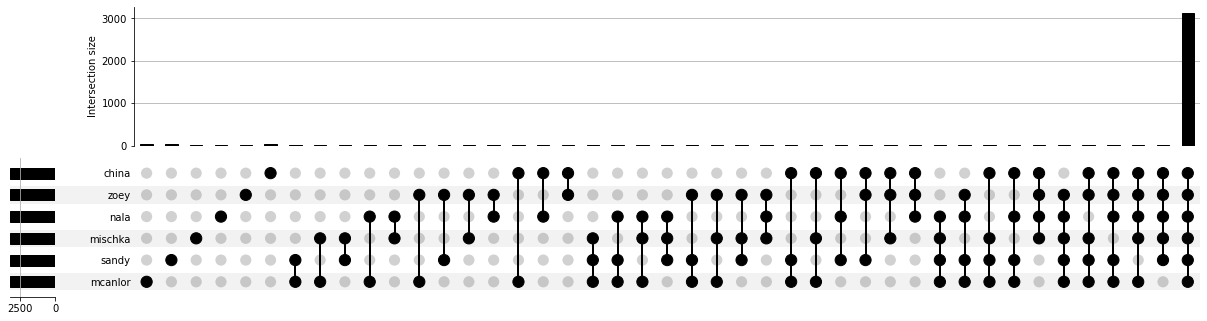

In [50]:
retrocopy_upset_data = from_memberships(upset_keys, list(rc_name_counts.values()))
plot(retrocopy_upset_data)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

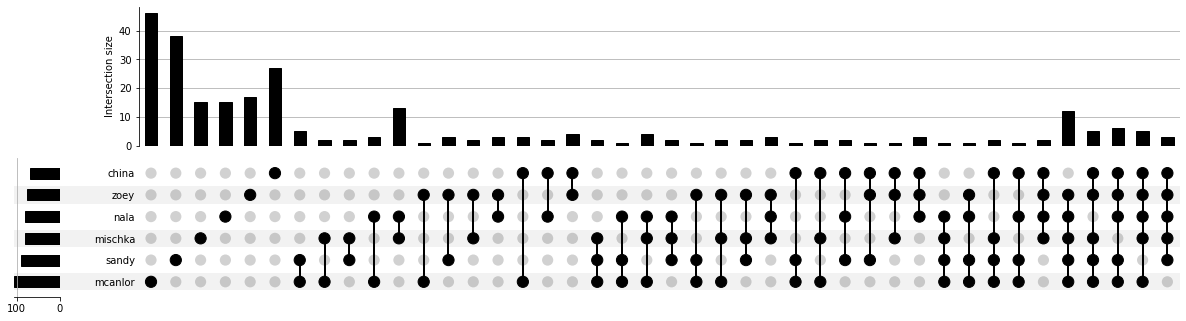

In [51]:
retrocopy_upset_data = from_memberships(upset_keys_wo_all, list(rc_name_counts_wo_all.values()))
plot(retrocopy_upset_data)

In [52]:
# rate analysis

In [53]:
dog_to_assembly = {}
dog_to_assembly['china'] = "China_UNSW_CanFamBas_1.2"
dog_to_assembly['sandy'] = 'Sandy_ASM325472v2'
dog_to_assembly['nala'] = 'Nala_ASM864105v3'
dog_to_assembly['zoey'] = 'zoey'
dog_to_assembly['mischka'] = 'mischka'

In [54]:
dog_autosomal_sizes = {dog:0 for dog in dogs} # redo with mcanlor subtractions 
dog_aligned_regions = {dog:[] for dog in dogs}
for dog, assembly in dog_to_assembly.items():
    print(dog)
    f = open("get_snps/VAR/{}.var.txt".format(assembly))
    for line in f:
        line = line.rstrip().split()
        if line[0] != "R":
            continue
        if line[1] == "chrX" or 'chrUn' in line[1] or 'chrY' in line[1] or 'chrM' in line[1] or "CTG" in line[1] or "scaffold" in line[1]:
            continue
        size = int(line[3]) - int(line[2])
        dog_autosomal_sizes[dog] += size
        dog_aligned_regions[dog].append([line[1], line[2], line[3]])
dog_autosomal_sizes

china
sandy
nala
zoey
mischka


{'china': 2127037040,
 'nala': 2179615493,
 'zoey': 2137909121,
 'sandy': 2169803468,
 'mischka': 2142193671}

In [55]:
dog_aligned_regions

{'china': [['chr1', '4629', '88368'],
  ['chr1', '88632', '240929'],
  ['chr1', '398027', '493128'],
  ['chr1', '493198', '693943'],
  ['chr1', '883207', '1002875'],
  ['chr1', '1032775', '1213400'],
  ['chr1', '1213575', '1389113'],
  ['chr1', '1397822', '1492569'],
  ['chr1', '1557619', '1614410'],
  ['chr1', '1626991', '1688617'],
  ['chr1', '1693144', '1983930'],
  ['chr1', '2019703', '2173909'],
  ['chr1', '2185842', '2435866'],
  ['chr1', '2436138', '2495308'],
  ['chr1', '2495365', '2706315'],
  ['chr1', '2706562', '2771074'],
  ['chr1', '2771211', '3046558'],
  ['chr1', '3046702', '3290989'],
  ['chr1', '3291111', '3404273'],
  ['chr1', '3404867', '3511507'],
  ['chr1', '3539622', '3734269'],
  ['chr1', '3806407', '3958058'],
  ['chr1', '3958142', '4176358'],
  ['chr1', '4177178', '4402050'],
  ['chr1', '4402173', '4563267'],
  ['chr1', '4563383', '4763868'],
  ['chr1', '4799419', '4880946'],
  ['chr1', '4911267', '5092324'],
  ['chr1', '5094252', '5886532'],
  ['chr1', '588662

In [56]:
# bedtools subtract fastcn, biser, TRF files 
dog_autosomal_sizes_without_all = {dog:0 for dog in dogs}
for dog in dogs:
    if dog == "china":
        dog_autosomal_sizes_without_fastcn[dog] = dog_autosomal_sizes[dog] # china has no fastcn
        continue
    f = open("{}.aligned_regions_subtract_all.txt".format(dog), 'rt')
    for line in f:
        line = line.rstrip().split()
        size = int(line[2]) - int(line[1])
        dog_autosomal_sizes_without_fastcn[dog] += size
    f.close()
dog_autosomal_sizes_without_fastcn

{'china': 2127037040,
 'nala': 1969840247,
 'zoey': 2045619509,
 'sandy': 2060285255,
 'mischka': 2034111058}

In [57]:
dog_snps = {}
dog_snp_positions = {}
for dog, assembly in dog_to_assembly.items():
    print(dog)
    dog_snps[dog] = 0
    dog_snp_positions[dog] = []
    f = open("get_snps/VCF/{}.vcf".format(assembly), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        if line[0][0] == "#":
            continue
        chro = line[0]
        pos = line[1]
        if "chrUn" in chro or "chrY" in chro or "chrM" in chro or "CTG" in chro or "scaffold" in chro or "chrX" in chro:
            continue
        if len(line[3]) == 1 and len(line[4]) == 1:
            dog_snps[dog] += 1
            dog_snp_positions[dog].append((chro, pos, pos))
    f.close()
dog_snps

china
sandy
nala
zoey
mischka


{'china': 4687162,
 'sandy': 4716709,
 'nala': 4771053,
 'zoey': 4433103,
 'mischka': 4603439}

In [58]:
chrX_snps = {}
for dog, snps in dog_snp_positions.items():
    chrX_snps[dog] = 0
    for i in snps:
        if "chrX" in i[0]:
            chrX_snps[dog] += 1
chrX_snps # should be 0

{'china': 0, 'sandy': 0, 'nala': 0, 'zoey': 0, 'mischka': 0}

In [59]:
dog_snps_in_aligned = {dog:0 for dog in dogs} 
for dog in dogs:
    f = open("{}.SNPs_in_aligned_regions.txt".format(dog), 'rt')
    for line in f:
        dog_snps_in_aligned[dog] += 1
    f.close()
dog_snps_in_aligned

{'china': 4515110,
 'nala': 4292145,
 'zoey': 4238365,
 'sandy': 4476291,
 'mischka': 4365604}

In [60]:
wolf_mut = 4.5e-9
low_bound = 2.6e-9
high_bound = 7.1e-9

In [62]:
dog_generations = {}
low_high_generations = {}
for dog, filtered_snps in dog_snps_in_aligned.items():
    print(dog)
    generations = (1/2) * filtered_snps / dog_autosomal_sizes_without_fastcn[dog] * (1/wolf_mut)
    gen_low = (1/2) * filtered_snps / dog_autosomal_sizes_without_fastcn[dog] * (1/high_bound)
    gen_high = (1/2) * filtered_snps / dog_autosomal_sizes_without_fastcn[dog] * (1/low_bound)
    print("generations:", round(generations,0),  "{}-{}".format(str(round(gen_low)), str(round(gen_high))))
    print()
    dog_generations[dog] = round(generations,0)
    low_high_generations[dog] = [gen_low, gen_high]

china
generations: 235858.0 149488-408216

nala
generations: 242103.0 153446-419025

zoey
generations: 230214.0 145910-398447

sandy
generations: 241406.0 153004-417818

mischka
generations: 238466.0 151141-412730



In [65]:
# calculate the rate but disregard N/A
retrocopies_in_mcl_w_na = {}
for mcl_coord, dog_rcs in retrocopies_in_mcl_coords_tracker.items():
    retrocopies_in_mcl_w_na[mcl_coord] = {}
    for entry in dog_rcs:
        dog = entry[0]
        presence = entry[3]
        retrocopies_in_mcl_w_na[mcl_coord][dog] = presence
retrocopies_in_mcl_w_na

{('chr1', '16227', '16938'): {'mcanlor': 'YES',
  'nala': 'YES',
  'zoey': 'YES',
  'china': 'YES',
  'sandy': 'YES',
  'mischka': 'YES'},
 ('chr1', '3667655', '3669201'): {'mcanlor': 'YES',
  'china': 'NO',
  'sandy': 'NO',
  'mischka': 'NO',
  'zoey': 'NO',
  'nala': 'NO'},
 ('chr1', '4962924', '4963349'): {'mcanlor': 'YES',
  'china': 'YES',
  'nala': 'YES',
  'zoey': 'YES',
  'sandy': 'YES',
  'mischka': 'YES'},
 ('chr1', '5722293', '5724097'): {'mcanlor': 'YES',
  'china': 'YES',
  'nala': 'YES',
  'zoey': 'YES',
  'sandy': 'YES',
  'mischka': 'YES'},
 ('chr1', '5777011', '5778288'): {'mcanlor': 'YES',
  'china': 'YES',
  'nala': 'YES',
  'zoey': 'YES',
  'sandy': 'YES',
  'mischka': 'YES'},
 ('chr1', '7083083', '7085937'): {'mcanlor': 'YES',
  'china': 'YES',
  'nala': 'YES',
  'zoey': 'YES',
  'sandy': 'YES',
  'mischka': 'YES'},
 ('chr1', '7493103', '7494318'): {'mcanlor': 'YES',
  'nala': 'YES',
  'zoey': 'YES',
  'sandy': 'YES',
  'mischka': 'YES',
  'china': 'YES'},
 ('chr1'

In [66]:
def determine_rate_against_mcl_w_na(dog):
    print(dog)
    unique_to_mcl = 0
    unique_to_dog = 0
    
    for mcl_coord, dog_presence in retrocopies_in_mcl_w_na.items():
        if dog_presence[dog] == "YES" and dog_presence["mcanlor"] == "NO":
            unique_to_dog += 1
        elif dog_presence[dog] == "NO" and dog_presence["mcanlor"] == "YES":
            unique_to_mcl += 1
    print("RCs unique to {}:".format(dog), unique_to_dog)
    print("RCs unique to mCanLor1.2:", unique_to_mcl)
    
    avg_unique_retrocopies = (unique_to_dog + unique_to_mcl)/2
    print("Avarage number of RCs since divergence:", avg_unique_retrocopies)
    rate_of_insertion = round(avg_unique_retrocopies/dog_generations[dog], 6)
    low_rate = round(avg_unique_retrocopies/low_high_generations[dog][0], 6)
    high_rate = round(avg_unique_retrocopies/low_high_generations[dog][1], 6)
    
    print("Generations passed since divergence from mCanLor1.2:", dog_generations[dog])
    print("Generational range: {}-{}".format(round(low_high_generations[dog][0]), round(low_high_generations[dog][1])))
    print("Rate of insertion:", rate_of_insertion)
    print("1 in {} Births".format(round(1/rate_of_insertion)))
    print("Range of rate of insertion: {} to {}".format(low_rate, high_rate))
    print("Range of X births: {} to {}".format(round(1/low_rate), round(1/high_rate)))
    print()
    
    return rate_of_insertion, low_rate, high_rate

In [67]:
total_dog_rate = 0
total_low_rate = 0
total_high_rate = 0
for dog in dogs:
    dog_rate, dog_low, dog_high = determine_rate_against_mcl_w_na(dog)
    total_dog_rate += dog_rate
    total_low_rate += dog_low
    total_high_rate += dog_high
print("Average rate of insertion:", round(total_dog_rate/5, 6))
print("Average: 1 in {} births".format(round(1/(total_dog_rate/5))))
print("Average range: {} - {}".format(round(total_low_rate/5, 6), round(total_high_rate/5, 6)))
print("Range from 1 in {} to {} births".format(round(1/(total_low_rate/5)), round(1/(total_high_rate/5))))

china
RCs unique to china: 48
RCs unique to mCanLor1.2: 92
Avarage number of RCs since divergence: 70.0
Generations passed since divergence from mCanLor1.2: 235858.0
Generational range: 149488-408216
Rate of insertion: 0.000297
1 in 3367 Births
Range of rate of insertion: 0.000468 to 0.000171
Range of X births: 2137 to 5848

nala
RCs unique to nala: 52
RCs unique to mCanLor1.2: 79
Avarage number of RCs since divergence: 65.5
Generations passed since divergence from mCanLor1.2: 242103.0
Generational range: 153446-419025
Rate of insertion: 0.000271
1 in 3690 Births
Range of rate of insertion: 0.000427 to 0.000156
Range of X births: 2342 to 6410

zoey
RCs unique to zoey: 47
RCs unique to mCanLor1.2: 78
Avarage number of RCs since divergence: 62.5
Generations passed since divergence from mCanLor1.2: 230214.0
Generational range: 145910-398447
Rate of insertion: 0.000271
1 in 3690 Births
Range of rate of insertion: 0.000428 to 0.000157
Range of X births: 2336 to 6369

sandy
RCs unique to san